# R Workbook 2: What is the Difference by Year?

In previous workbook, we looked at how to bring in a dataset in a Pandas Data Frame and explore it. In this workbook, we'll explore more of how we can use Python to automate and speed up analysis. In addition, we'll look at using basic visualizations.

## <span style = "color:green">Motivating Question</span>

So far, we've only looked at data from 2015. However, part of what makes the LODES data so useful is the availability of the data over many years. The data are available in multiple CSV files. There are many insights we might find from analyzing data over years, so we want to be able to bring them all together. In this notebook, we'll explore how to do that as we try to answer the following questions:

**What is the difference in the number of jobs by age group and by year? What are the different trends across years?**

To answer these, we'll introduce you to creating Python functions to make reading datasets easier. Then, we'll use them within loops to automate reading in datasets. Finally, we'll show some basic visualizations with the data that we get to bring it all together.

## Starting Out
As before, we'll start by loading libraries. We have a few more commands we'll be running in the beginning since we're also going to be doing some visualizations.

In [29]:
library(tidyverse)
theme_set(theme_gray(base_size = 20))
options(repr.plot.width = 12, repr.plot.height = 9)

## <span style="color:green">Creating Functions (VIDEO)</span>

First, we start off by creating a function. You're familiar with functions in general already, since you've used them to do various things like determining the type of an object (by using `class()`) or finding the mean of a list of numbers (using `mean()`). Here, we'll walk through creating your own function. This helps simplify your code make it much more readable if you're going to be doing the same thing many times, as you won't have to copy and paste your code each time you want to do a certain task.

Let's start with a very basic function. Suppose we want a function that takes an argument and returns the squared value. 

In [2]:
squarer <- function(x){
    y = x^2
    return(y)
}

In [3]:
squarer(4)

[1] 16

Here, we're creating a function called `squarer` which takes an input, `x`, and outputs the squared value. Let's break it down line by line.

    squarer <- function(x){
        return()
    }

The `function` indicates that we're defining a function. This is being assigned to `squarer`, so that is what the name of our function will be. Then, in parentheses, we put in any arguments we want the function to take. If we don't want it to take any arguments, we can just leave it blank. Lastly, we end the line with a colon. 

This takes us to the next lines. 

    y = x^2
    return(y) 
    
Here, we have two lines, which assigns the value `x^2` to `y`, then uses the `return` function to output it. 

Lastly, we have unindented lines, which aren't part of the function.
    
    squarer(4)

This just uses the function with the argument `4` to see if it works and gives us a value of 16. 

### Writing a Function to get CA Data



In [4]:
get_ca_wac <- function(year){
    base_url <- 'https://lehd.ces.census.gov/data/lodes/LODES7/'
    file_specs <- str_replace_all('ca/wac/ca_wac_S000_JT00_YEAR.csv.gz', 'YEAR', as.character(year))
    file_name <- paste(base_url, file_specs, sep = '')
    
    return(read_csv(file_name, col_types = cols()))
}

In [5]:
ca_wac_2015 <- get_ca_wac(2015)

Let's break down the pieces of the function. First, we define the function using `function`, with the arguments inside parentheses. Then, inside the curly braces, we put the actions that we want the function to take. The first line inside the function is 

    base_url <- 'https://lehd.ces.census.gov/data/lodes/LODES7/'

This creates a string called `base_url` which contains the first part of the URL that we will get our data from. This will be the same no matter which year we want to get our data for. 

Next, we use 

    file_specs <- str_replace_all('ca/wac/ca_wac_S000_JT00_YEAR.csv.gz', 'YEAR', as.character(year))

This does a few things. First, the `str_replace_all` function replaces all instances of `YEAR` with the year we passed as the argument in the function. Note that we use the `as.character` function to make sure that the year we include is a character, because `str_replace_all` needs to replace with a character.

This provides us with two parts to a URL: the `base_url`, as well as the subsequent `file_specs`. We just need to put these together to get the full url, which we do in the next line

    file_name <- paste(base_url, file_specs, sep = '')
    
The `paste` function is used to combine two character objects, with the `sep = ''` argument indicating that we don't want anything between the two. 

Finally, the last line provides the output.

    return(read_csv(file_name, col_types = cols()))
    
Note that we use the `read_csv` function and return the output of that function directly, and that we actually included an additional argument here:

    col_types = cols()
    
This just specifies that we want to use the default column types instead of specifying the column types explicitly. This is the default behavior already, but doing this avoids displaying the message that pops up about column specifications.

### Function for WAC Data from Any State

What if we wanted to get WAC data from any state instead of just California? We can adjust the function to allow for this.

In [6]:
get_wac <- function(state, year){
    base_url <- 'https://lehd.ces.census.gov/data/lodes/LODES7/'
    file_specs <- str_replace_all('STATE/wac/STATE_wac_S000_JT00_YEAR.csv.gz', 'STATE', state) %>% str_replace_all('YEAR', year)
    file_name <- paste(base_url, file_specs, sep = '')
    
    return(read_csv(file_name, col_types = cols()))
}

In [7]:
df <- get_wac('ca', '2015')

We need to change the location of the file depending what year we want to get. We do this by using the `format()` method on a string. Notice that in the string

    https://lehd.ces.census.gov/data/lodes/LODES7/ca/wac/ca_wac_S000_JT00_{yr}.csv.gz

we have a part with curly braces, `{yr}`. This is followed by an argument in `format()` of `yr = year`. This means that whenever we see `{yr}` in the string, we replace it with whatever is in `year`. This gives us the string we want. For example, if the year we want is 2015, the file is at `https://lehd.ces.census.gov/data/lodes/LODES7/ca/wac/ca_wac_S000_JT00_2015.csv.gz`.

In this function, we put the Data Frame that we want in `output`. The line

    output = read_csv(file_name)

should look relatively familiar to you, since we've used the `read_csv()` method before.

Finally, we use the `return()` statement to give the result of our function, which is the Data Frame that we put in `output`. 

Let's try using this function to get the dataset from 2015.

## <span style = "color:green">Using Loops (VIDEO)</span>

Sometimes, we want to run the same code many times over. In these case, we can use loops so that we don't have to copy and paste the code over and over. To demonstrate how loops work, we'll first look at a basic `for` loop.

In [8]:
for(i in 1:10){
    print(i)
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10


Here, we are looping through the numbers 1 to 10 and printing them out. Let's break down how each part works.

First, consider the first line.

    for(i in 1:10){

This indicates that we will be looping through the values of 1 to 10, incrementing `i` in each iteration. That is, the code will use `i=1` for one iteration. Then, it will go back and do everything again, except using `i=2`. This keeps going until it hits `i=10`, after which it stops. 

Notice that the second line is indented. This is a convention that we use to delineate when the loop starts and ends, but is not necessary. All that matters is that the contents of the loop are inside the curly braces. 

The next line, and everything that comes between the curly braces for loops that are longer, contains everything that we want to do multiple times. Here, we see the following as the only code inside those curly braces.

    print(i)

This means that it will print the value of `i` every iteration. So, it takes `i=1`, then runs `print(i)`. Then, it sets `i=2` and runs `print(i)`. This is how we get the output that we observed.


## Using a For Loop to Read In CSV Files

Now that we've gone over the basics of how a for loop works, let's apply it to reading in multiple CSV files. We've already created a function that takes a year and reads a CSV file. We want to do this for multiple years automatically, so that we don't need to keep on changing the year and running the code again (if, for example, we want to do this for many years). So, in other words, we want to create a loop that runs the same code multiple times, with only the year changed.

Part of our task is a bit easier, since we've already created a function that does what we want. Now, all we need to do is loop through the years we want, calling that function with a different argument for the year.

### Using R lists

There's one small complication though: how will we automate storage of these Data Frame objects? There's multiple possibilities, but the way we'll do it is using a **list** in R. A **list** is just another way of storing data, but it's more flexible than the data frames that we've been working with.

In [9]:
example_list <- list(1:10, 'example')

In [10]:
str(example_list)

List of 2
 $ : int [1:10] 1 2 3 4 5 6 7 8 9 10
 $ : chr "example"


We can access the elements of the list by using double brackets. So, to get the first element of the list, which would be the vector of numbers from 1 to 10, we can use the following.

In [11]:
example_list[[1]]

[1]  1  2  3  4  5  6  7  8  9 10

### <span style="color:green">Using Loops and Functions to Bring in Multiple Datasets  (VIDEO)</span>
We'll start by creating an empty dictionary in which we'll store the Data Frames that we read in. Then, we're going to loop through a few years (here, we'll do 2009 to 2015), calling the `get_wac` function we created earlier to store the appropriate dataset in the dictionary. We'll also make sure to provide the proper key when storing the dataset, so that we can easily access it. 

In [12]:
wac_all_years <- list()

for (i in 1:6){
    wac_all_years[[i]] <- get_ca_wac(i+2010)    
}

[1] "Getting data for 2011"
[1] "Getting data for 2012"
[1] "Getting data for 2013"
[1] "Getting data for 2014"
[1] "Getting data for 2015"
[1] "Getting data for 2016"


## Visualizations using `qplot`
    
Visualizations can help us look at summaries of the data. They can also aid in providing good presentation aids.

In this section, we'll look at a few basic types of visualizations: histograms, boxplots, lineplots. In practice, there are many more types of visualizations. Furthermore, there are many different packages that can help you create these different visualizations. While we'll focus only on the basics here with the base R functions as well as `qplot` from the `ggplot2` package, keep in mind that there are many tools available.

### Making a Histogram
We'll start with a basic histogram. A histogram is useful for looking at the distribution of a numerical variable (that is, a variable that takes numbers as its values as opposed to categories). They can visually represent the spread and center of the variable, as well as provide insights to the shape of the distribution. For example, we can look at the number of **modes**, or peaks, in the data, which wouldn't be captured in numerical summaries such as mean or variance. We can also get a better idea of the **skew** of the data, determining whether most units are grouped on the left or right side (lower or higher values), or whether it's mostly symmetrical. 

We'll first look at the simplest way to make a graph, then show how to customize it using the plotting parameters as well as Figure and Axes objects. Let's look at a histogram of the total jobs in the 2015 Workplace Area Characteristics for California.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



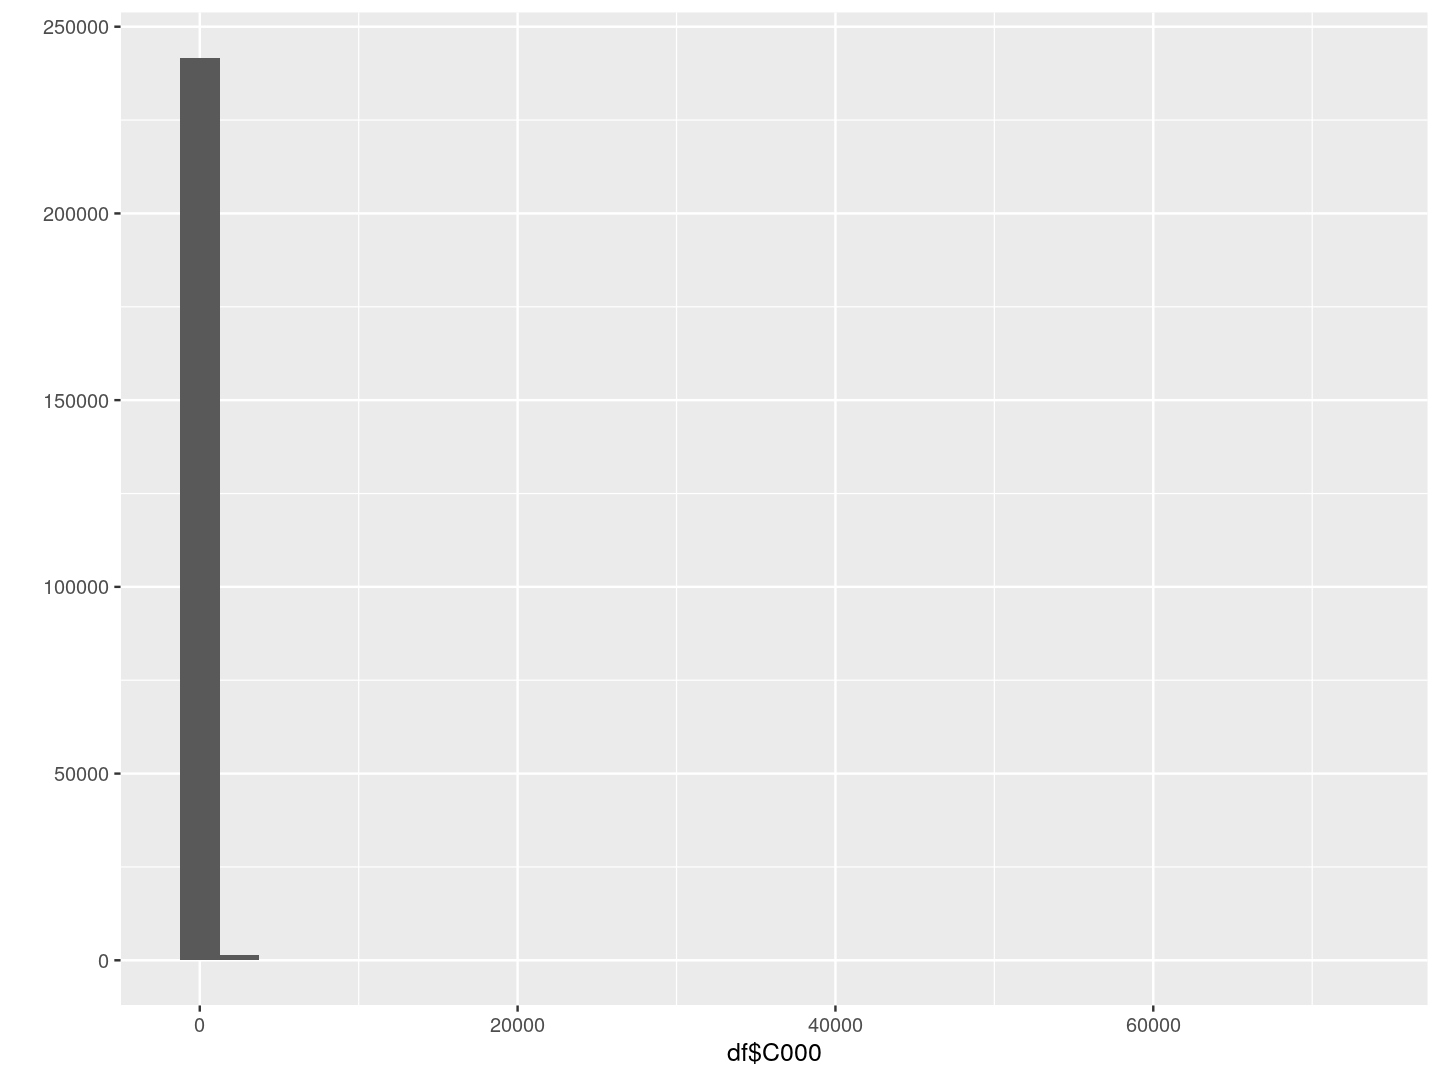

In [28]:
qplot(df$C000)

### Making a Scatterplot




In [ ]:
df_2011 <- wac_all_years[[1]]

In [ ]:
plot(df_2011$CA01, df_2011$CA02)

In [14]:
CA_over_years <- data.frame(Year = rep(NA,6), 
                           CA01 = rep(NA,6),
                           CA02 = rep(NA,6),
                           CA03 = rep(NA,6))

for (i in 1:6){
    CA_sum <- wac_all_years[[i]] %>% select(CA01, CA02, CA03) %>% summarize(Year = i+2010, CA01 = sum(CA01), CA02 = sum(CA02),CA03 = sum(CA03))
    CA_over_years[i,] <- CA_sum   
}



In [59]:
CA_years_long <- CA_over_years %>% pivot_longer(-Year, names_to = 'Age_Group', values_to = 'Jobs')

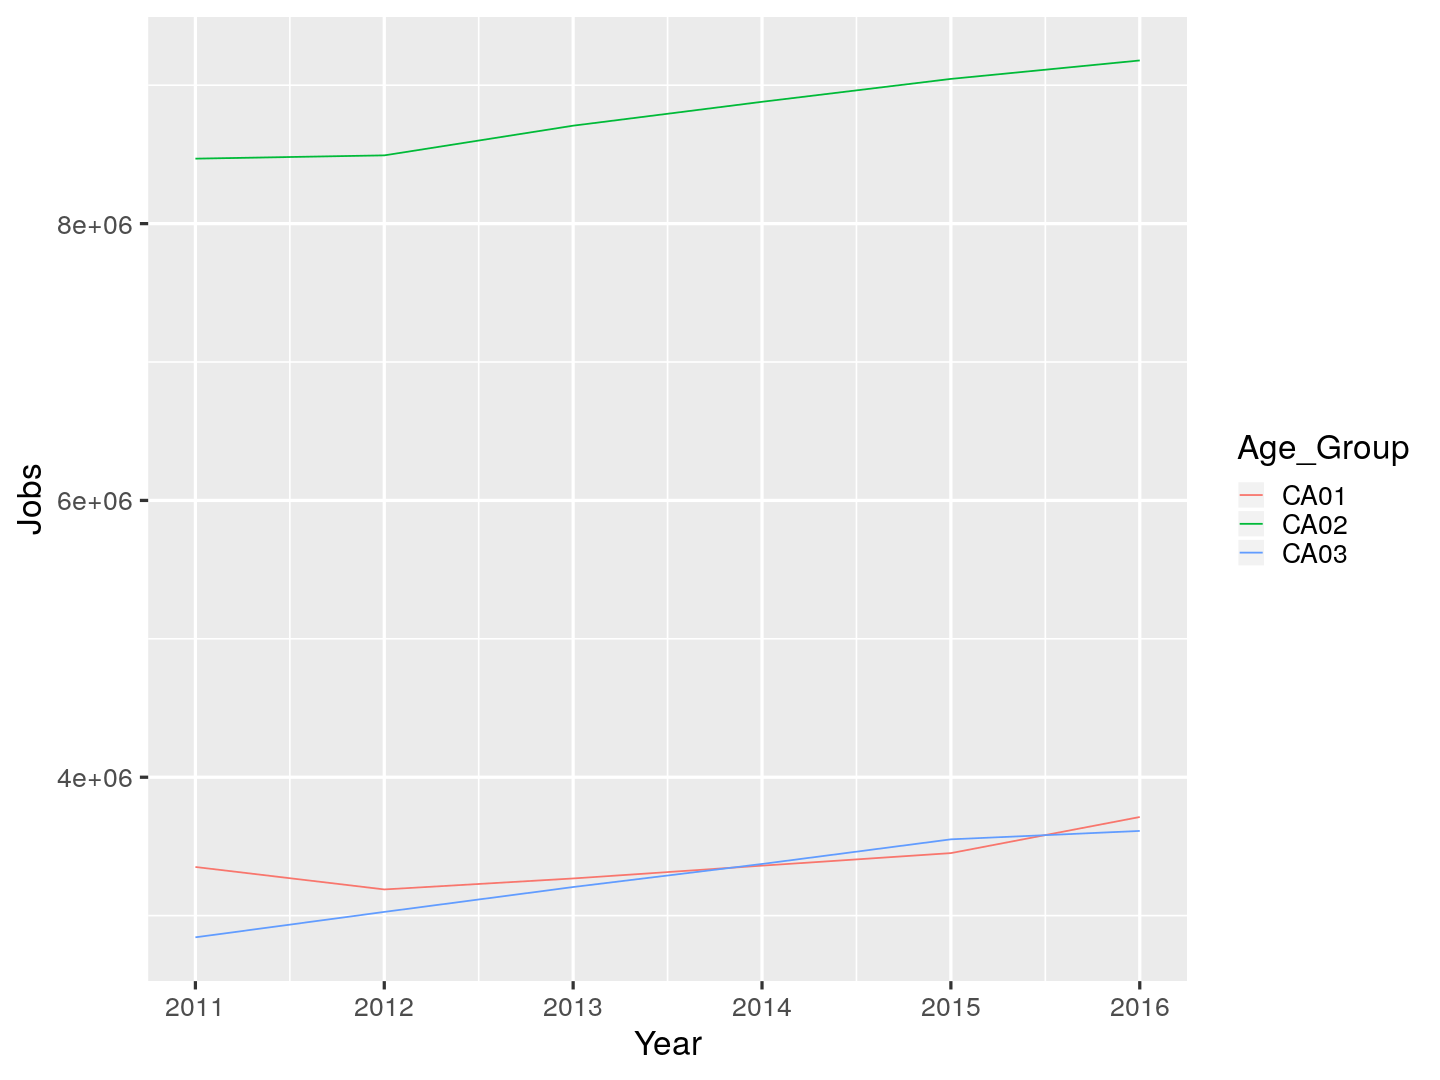

In [60]:
qplot(Year, Jobs, data = CA_years_long, color = Age_Group, geom = 'line')

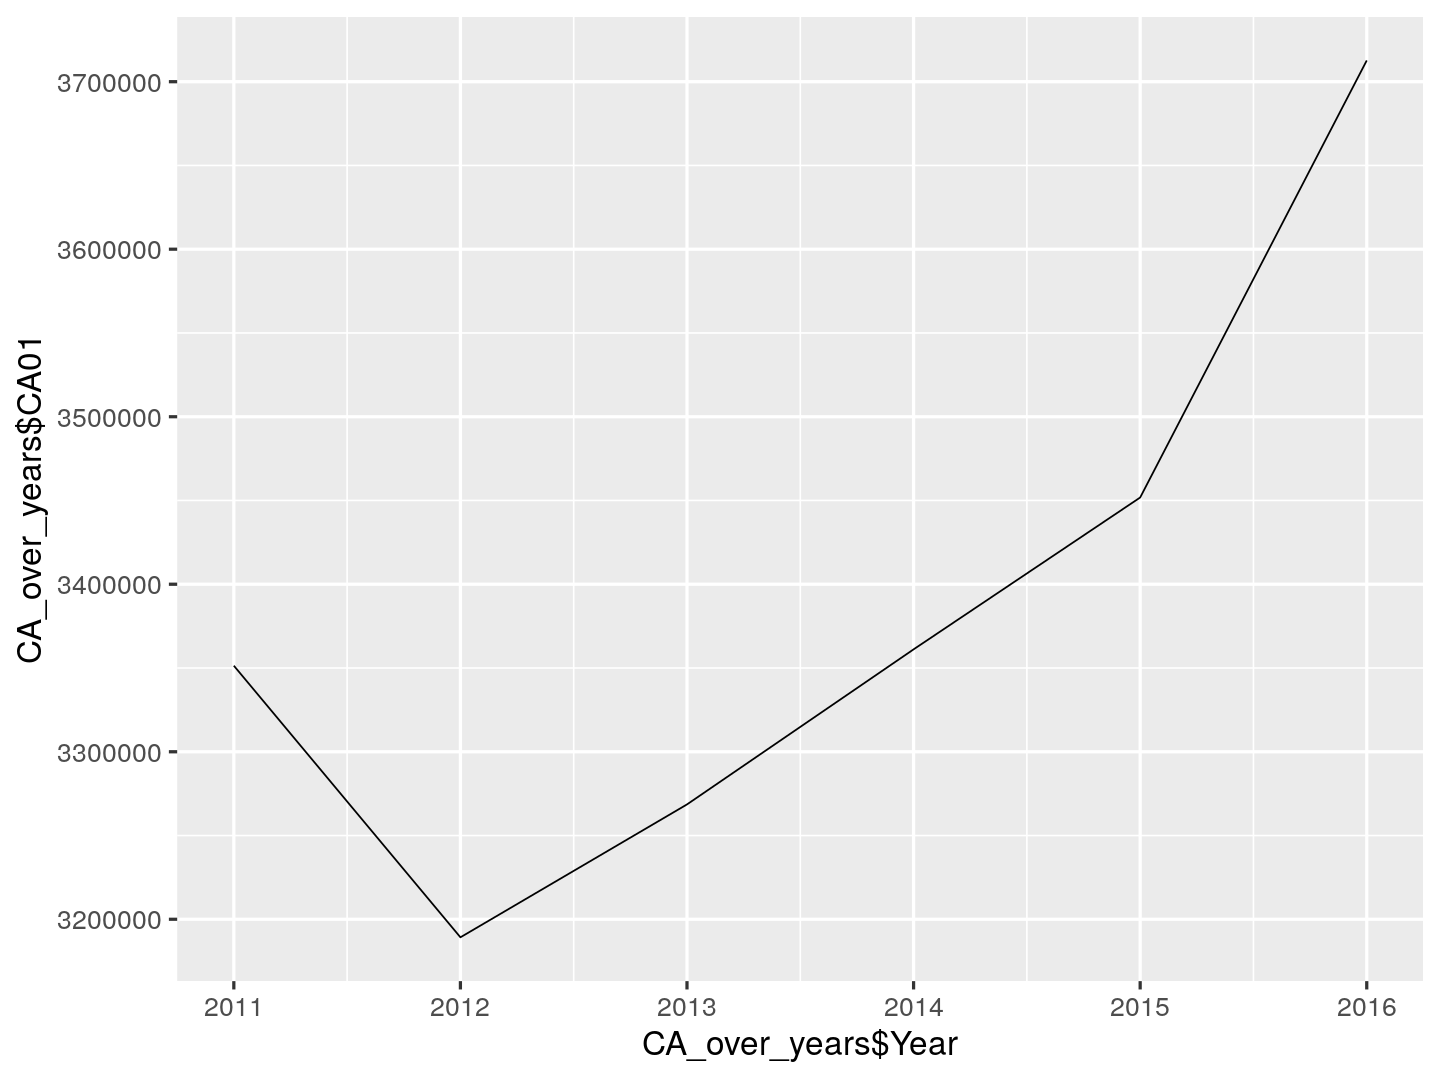

In [30]:
qplot(CA_over_years$Year, CA_over_years$CA01, geom = 'line')

In [ ]:
wac_all_years[[1]] %>% select(CA01, CA02, CA03) %>% summarize(CA01 = sum(CA01), CA02 = sum(CA02),CA03 = sum(CA03))


In [ ]:
CA_sum <- wac_all_years[[1]] %>% select(CA01, CA02, CA03) %>% apply(1, sum)
